
![Clothing Classifier Model](Clothing%20Classifier%20Model.png)


Fashion Forward is a new AI-based e-commerce clothing retailer.
They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

As a data scientist tasked with implementing a garment classifier, your primary objective is to develop a machine learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

In [52]:
# Run the cells below first

In [53]:
from tensorflow.keras import datasets, layers, models, Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

In [54]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

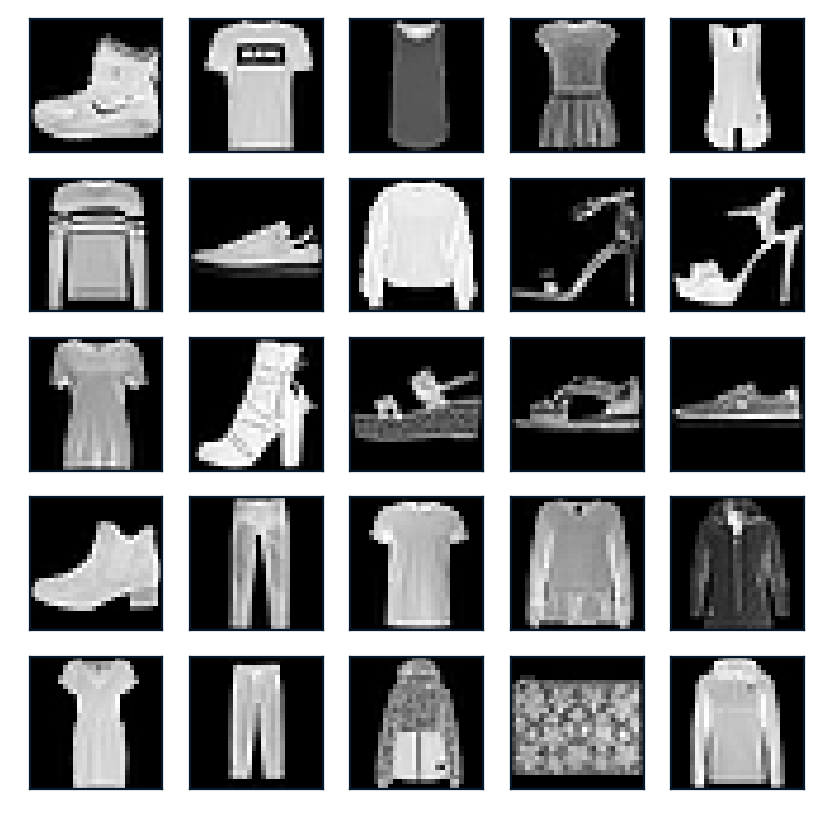

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

import numpy as np
np.unique(train_labels)

In [56]:
# Start coding here
# Use as many cells as you need

# Get number of classes
num_classes = len(set(train_labels))

# Get image size
img_size = train_images[0].shape[0]

# Hot encode labels
he_train_labels = to_categorical(train_labels)
he_test_labels = to_categorical(test_labels) # 10

# Create model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', strides=(1,1), input_shape=(img_size, img_size, 1)))
model.add(Conv2D(16, kernel_size=3, strides=(1,1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model
model.fit(train_images, he_train_labels, epochs=1, validation_split=0.2, batch_size=100, verbose=0)

# Evaluate model
scores = model.evaluate(test_images, he_test_labels, batch_size=100)

test_accuracy = scores[-1]

test_accuracy
    


100/100 [==============================] - 2s 17ms/step - loss: 0.4018 - accuracy: 0.8585


0.8585000038146973

In [57]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}